In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as scp
%matplotlib widget
import matplotlib.pyplot as plt
from collections import namedtuple

## Classify Location Found

In [41]:
LocationFoundData = namedtuple("LocationFoundData", "open_ground road trees building water source")

data = [
    LocationFoundData(
        open_ground=68.02, road=2.10,trees=28.31, building=0.03, water=1.53, source="J1"
    ),
    LocationFoundData(
        open_ground=38.36, road=38.95,trees=17.76, building=3.85, water=1.08, source="J2"
    ),
    LocationFoundData(
        open_ground=40.8, road=32.3,trees=3.1, building=23.1, water=0.8, source="Original"
    )
]

In [42]:
df = pd.DataFrame(data)\
    .rename(columns={'open_ground': 'Open Ground', 'road': 'Road', 'trees':'Trees','building':'Building', 'water':'Water', 'source':'Source'})\
    .melt(var_name="location_found", value_name="count", id_vars="Source")\
    .astype({'count': 'float'})
    
df

Source location_found  count
0         J1    Open Ground  68.02
1         J2    Open Ground  38.36
2   Original    Open Ground  40.80
3         J1           Road   2.10
4         J2           Road  38.95
5   Original           Road  32.30
6         J1          Trees  28.31
7         J2          Trees  17.76
8   Original          Trees   3.10
9         J1       Building   0.03
10        J2       Building   3.85
11  Original       Building  23.10
12        J1          Water   1.53
13        J2          Water   1.08
14  Original          Water   0.80

In [43]:
[f[1]['count'].sum() for f in df.groupby("Source")]

[99.99, 100.0, 100.09999999999998]

In [50]:
import numpy.typing as npt

def kldiv(y1: npt.NDArray[np.float64], y2: npt.NDArray[np.float64]) -> float:
    y2 = np.where(y2 == 0, np.finfo(float).eps, y2)
    y1 = np.where(y1 == 0, np.finfo(float).eps, y1)
    return float(np.sum(y1 * np.log(y1 / y2)))


def klsymdiv(y1: npt.NDArray[np.float64], y2: npt.NDArray[np.float64]) -> float:
    return kldiv(y1, y2) + kldiv(y2, y1)

In [60]:
klsymdiv(np.array(list(data[2]))[:-1].astype(float), np.array(list(data[0]))[:-1].astype(float)) # Source vs J1

306.01857556129744

In [61]:
klsymdiv(np.array(list(data[2]))[:-1].astype(float), np.array(list(data[1]))[:-1].astype(float)) # Source vs J1

61.5605364302449

In [67]:
N = 10_000_000
rand = np.random.uniform(0.0,1,(N,5))

rand = rand[~np.any(rand<0,axis=1)]

rand[rand==0] = np.finfo(float).eps
rand /= rand.sum(axis=1)[:,None]
rand *= 100

klsymdiv(np.array(list(data[2]))[:-1].astype(float), rand)/N

159.24319561488198

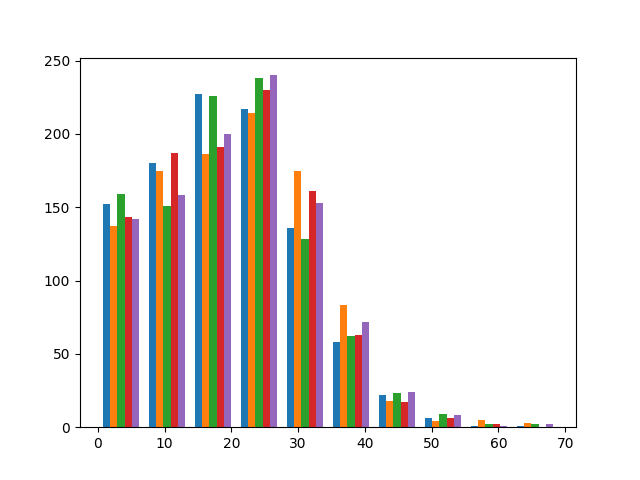

In [47]:
fig, ax = plt.subplots(1, 1)
ax.hist(rand[::int(N/1000)])
plt.show()

In [48]:
fig, ax = plt.subplots(1, 1)
sns.barplot(data=df, x="location_found", y="count", hue="Source", ax=ax)
ax.set_ylabel("Percent (%)")
ax.set_xlabel("Location Found")
plt.show()
fig.savefig(f"locations_found_combined.pdf")